In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score

Paso 1: Generar datos de ejemplo

Creamos un conjunto de datos de dos dimensiones con tres grupos distintos

In [39]:
def generar_datos():
    np.random.seed(42)
    grupo_1 = np.random.randn(100, 2) + np.array([0, -3])
    grupo_2 = np.random.randn(100, 2) + np.array([3, 3])
    grupo_3 = np.random.randn(100, 2) + np.array([-3, 3])
    datos = np.vstack([grupo_1, grupo_2, grupo_3])
    return datos

Paso 2: Inicializar los centroides

Seleccionamos aleatoriamente los centroides iniciales de los datos

In [40]:
def inicializar_centroides(datos, k):
    np.random.seed(42)
    indices = np.random.choice(datos.shape[0], k, replace=False)
    centroides = datos[indices]
    return centroides

Paso 3: Asignar cada punto al centroide más cercano

Calculamos la distancia de cada punto a los centroides y asignamos el punto al centroide más cercano

In [41]:
def asignar_centroides(datos, centroides):
    distancias = np.linalg.norm(datos[:, np.newaxis] - centroides, axis=2)
    etiquetas = np.argmin(distancias, axis=1)
    return etiquetas

Paso 4: Actualizar los centroides

Recalculamos los centroides como la media de los puntos asignados a cada centroide

In [42]:
def actualizar_centroides(datos, etiquetas, k):
    nuevos_centroides = np.array([datos[etiquetas == i].mean(axis=0) for i in range(k)])
    return nuevos_centroides

Paso 5: Ejecutar el algoritmo K-means con visualización de iteraciones

In [43]:
def kmeans_con_visualizacion(datos, k, max_iter=100):
    # Inicializamos los centroides
    centroides = inicializar_centroides(datos, k)

    for i in range(max_iter):
        # Asignamos los puntos a los centroides más cercanos
        etiquetas = asignar_centroides(datos, centroides)

        # Visualizamos la iteración actual
        visualizar_iteracion(datos, etiquetas, centroides, i)

        # Calculamos los nuevos centroides
        nuevos_centroides = actualizar_centroides(datos, etiquetas, k)

        # Verificamos si los centroides han cambiado
        if np.all(centroides == nuevos_centroides):
            break
        centroides = nuevos_centroides

    return etiquetas, centroides

Paso 6: Visualizar los resultados de cada iteración

In [44]:
def visualizar_iteracion(datos, etiquetas, centroides, iteracion):
    plt.scatter(datos[:, 0], datos[:, 1], c=etiquetas, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x', s=200)
    plt.title(f'Iteración {iteracion}')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.pause(0.5)

Paso 7: Visualizar los resultados finales

In [45]:
def visualizar_resultados(datos, etiquetas, centroides):
    plt.scatter(datos[:, 0], datos[:, 1], c=etiquetas, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x', s=200)
    plt.title('Resultado del algoritmo K-means')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.show()

Paso 8: Calcular métricas de validación

In [46]:
def calcular_metricas(datos, etiquetas):
    silueta = silhouette_score(datos, etiquetas)
    calinski_harabasz = calinski_harabasz_score(datos, etiquetas)
    return silueta, calinski_harabasz

Ejecución del algoritmo K-means

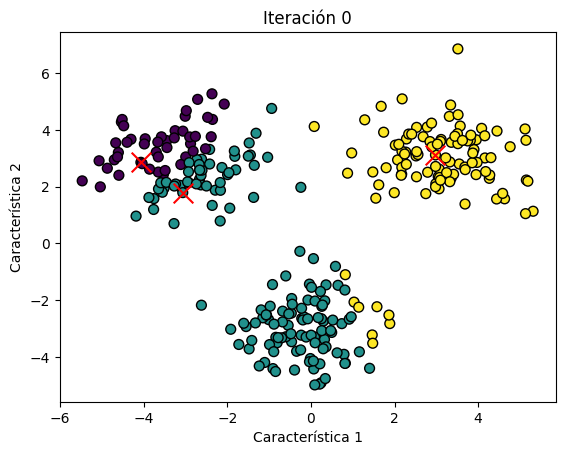

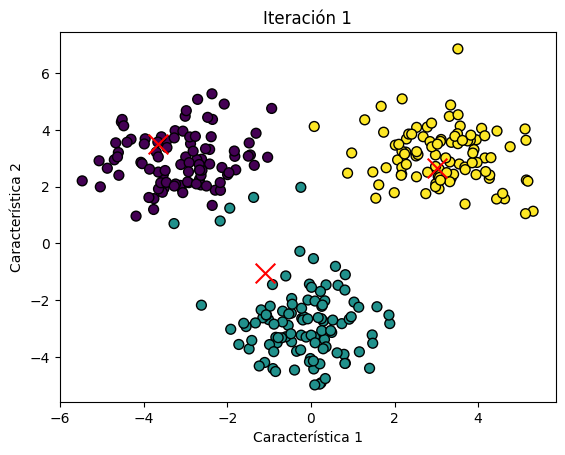

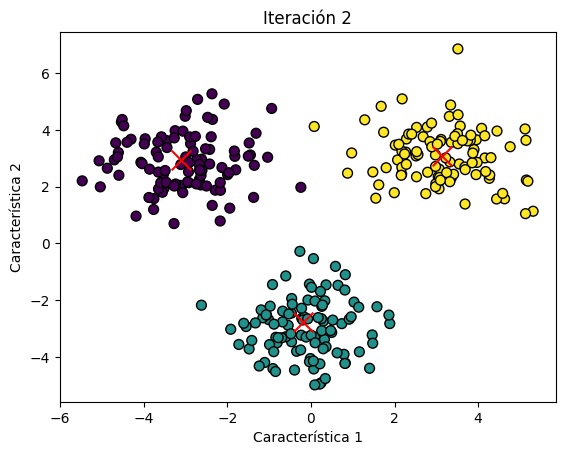

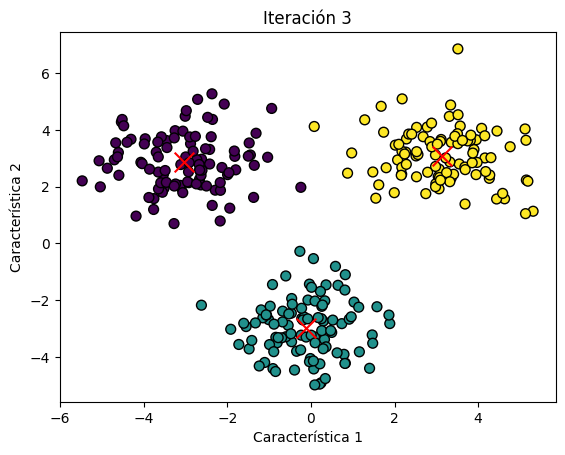

Coeficiente de Silueta: 0.72
Índice Calinski-Harabasz: 1135.20


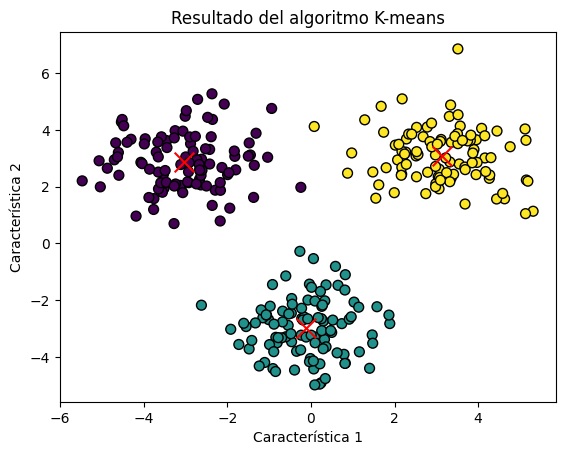

In [47]:
if __name__ == "__main__":
    # Generamos los datos de ejemplo
    datos = generar_datos()

    # Definimos el número de clusters
    k = 3

    # Ejecutamos el algoritmo K-means con visualización de iteraciones
    etiquetas, centroides = kmeans_con_visualizacion(datos, k)

    # Calculamos las métricas de validación
    silueta, calinski_harabasz = calcular_metricas(datos, etiquetas)
    print(f"Coeficiente de Silueta: {silueta:.2f}")
    print(f"Índice Calinski-Harabasz: {calinski_harabasz:.2f}")

    # Visualizamos los resultados finales
    visualizar_resultados(datos, etiquetas, centroides)

Modifica la función `generar_datos` para crear datasets con más de tres grupos (`k=4` o `k=5`). ¿Cómo afecta esto al número de iteraciones necesarias para que el algoritmo converja?  Visualiza los nuevos datos generados y describe las diferencias.

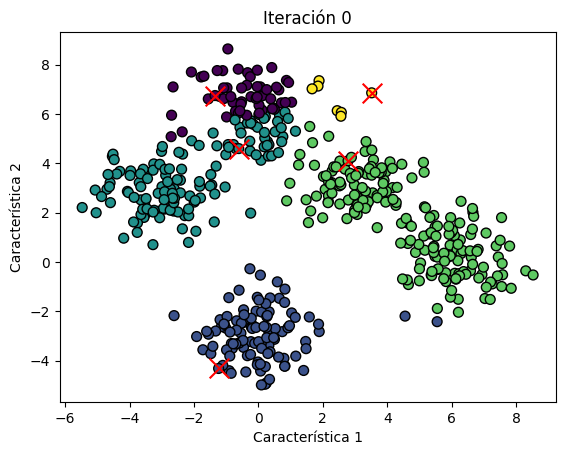

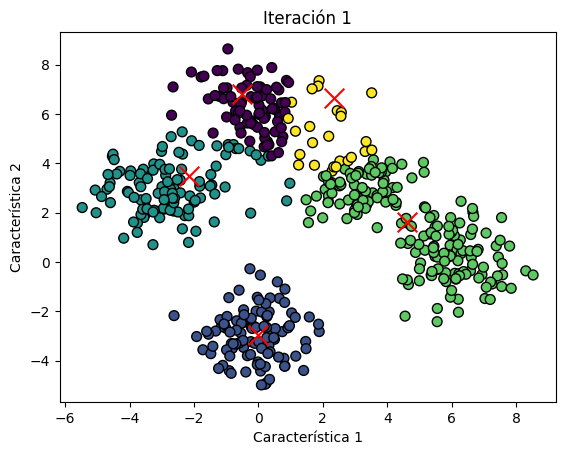

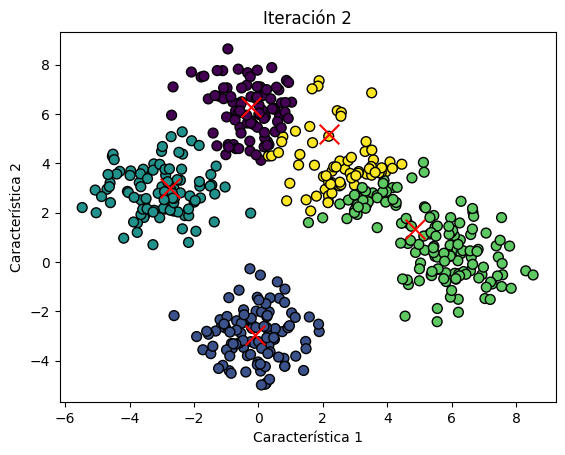

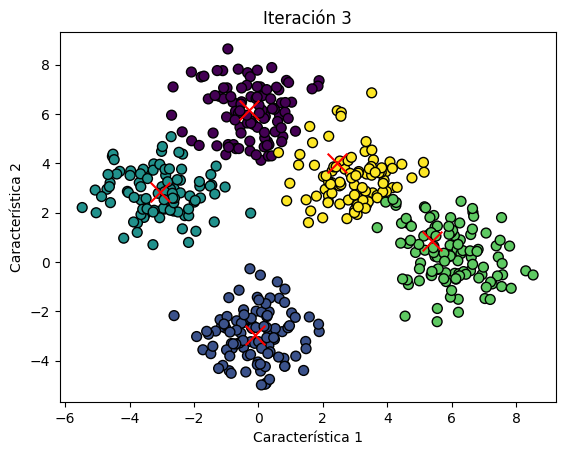

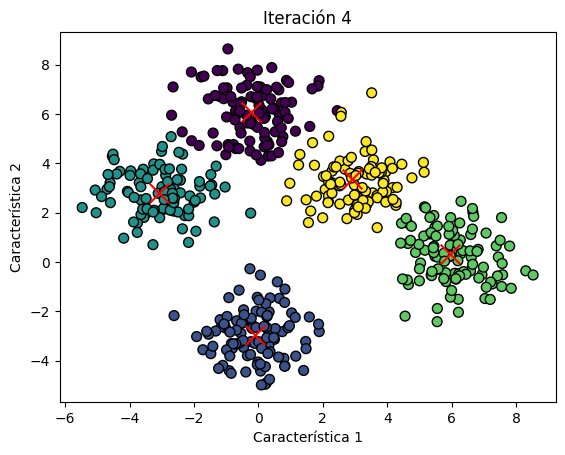

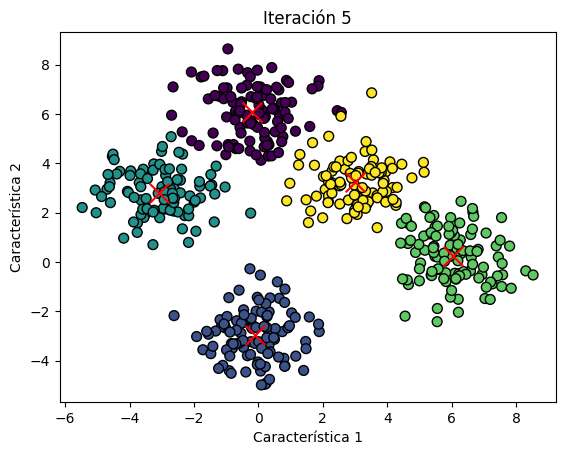

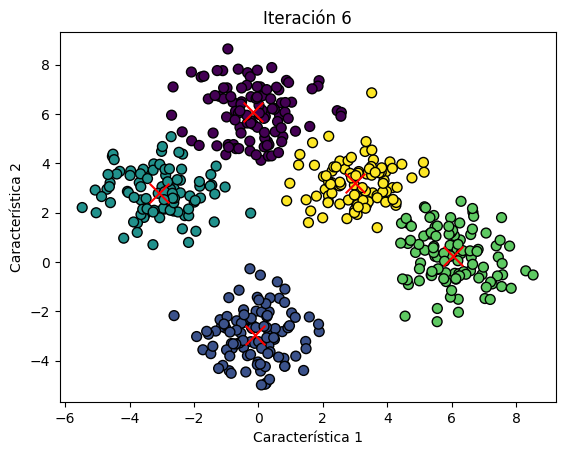

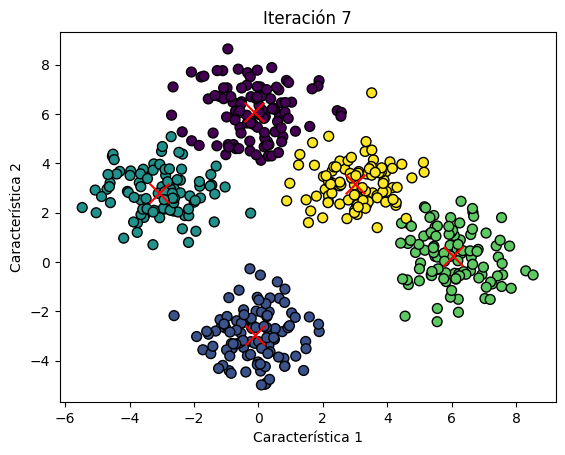

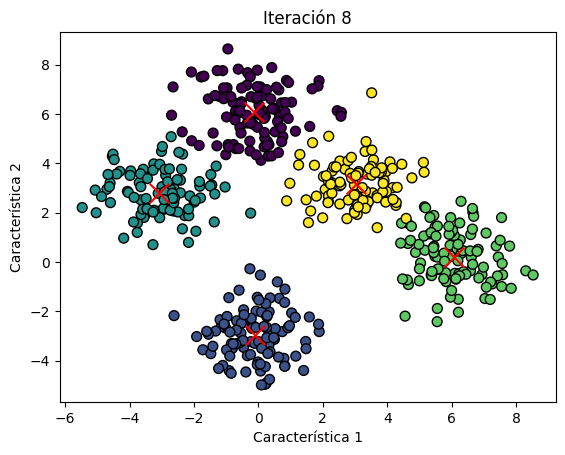

Coeficiente de Silueta: 0.60
Índice Calinski-Harabasz: 1305.19


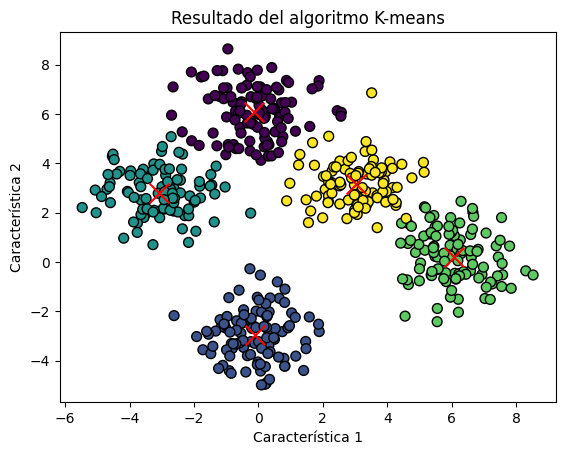

In [12]:
def generar_datos2():
    np.random.seed(42)
    grupo_1 = np.random.randn(100, 2) + np.array([0, -3])
    grupo_2 = np.random.randn(100, 2) + np.array([3, 3])
    grupo_3 = np.random.randn(100, 2) + np.array([-3, 3])
    grupo_4 = np.random.randn(100, 2) + np.array([0, 6])
    grupo_5 = np.random.randn(100, 2) + np.array([6, 0])
    datos = np.vstack([grupo_1, grupo_2, grupo_3, grupo_4, grupo_5])
    return datos

if __name__ == "__main__":
    # Generamos los datos de ejemplo
    datos = generar_datos2()

    # Definimos el número de clusters
    k = 5  # Cambiamos k a 5 para match con los nuevos grupos

    # Ejecutamos el algoritmo K-means con visualización de iteraciones
    etiquetas, centroides = kmeans_con_visualizacion(datos, k)

    # Calculamos las métricas de validación
    silueta, calinski_harabasz = calcular_metricas(datos, etiquetas)
    print(f"Coeficiente de Silueta: {silueta:.2f}")
    print(f"Índice Calinski-Harabasz: {calinski_harabasz:.2f}")

    # Visualizamos los resultados finales
    visualizar_resultados(datos, etiquetas, centroides)

Al aumentar el número de grupos el algoritmo necesitará más iteraciones para converger porque hay más centroides que necesitan encontrar su posición óptima y la complejidad del espacio de búsqueda aumenta

Introduce ruido a los datos generados añadiendo puntos aleatorios fuera de los clusters. ¿Cómo afecta el ruido a la convergencia del algoritmo? ¿Qué ocurre con las métricas de validación?

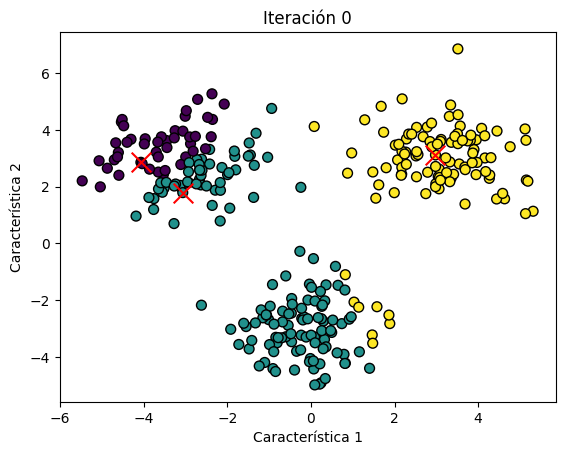

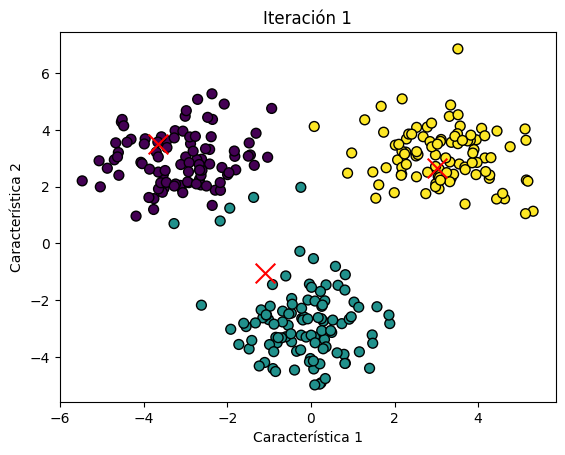

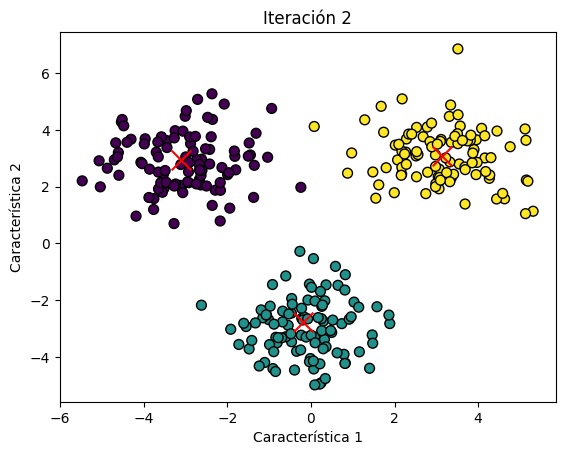

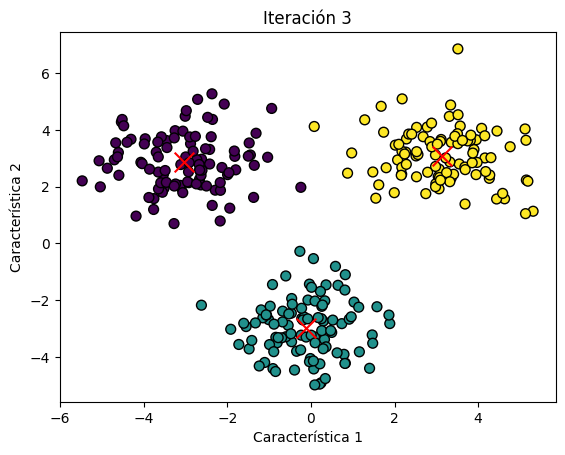


Resultados sin ruido:
Coeficiente de Silueta: 0.72
Índice Calinski-Harabasz: 1135.20


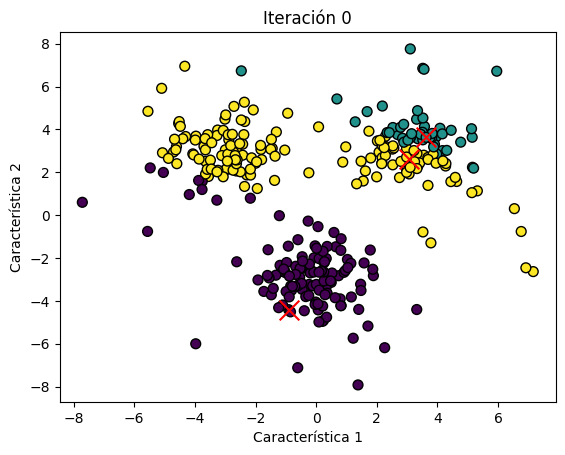

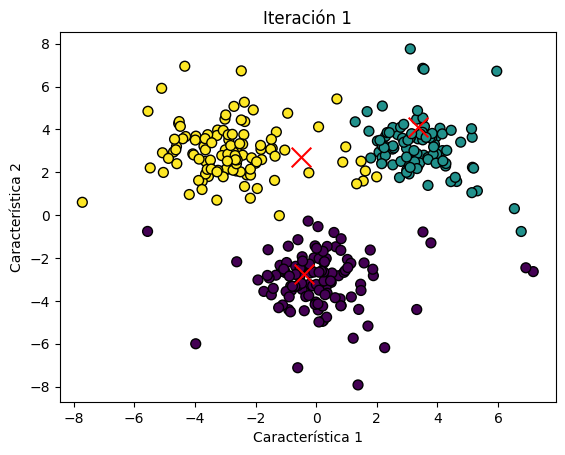

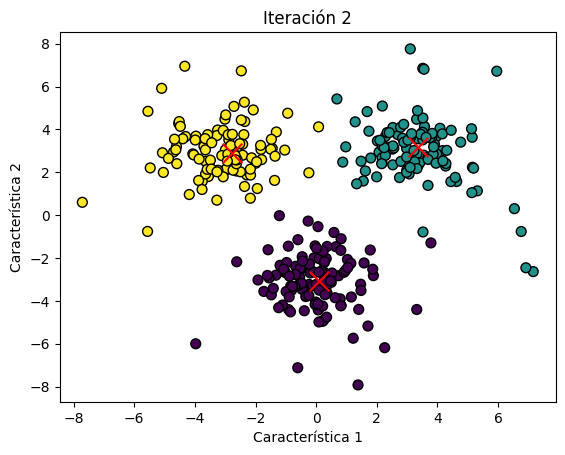

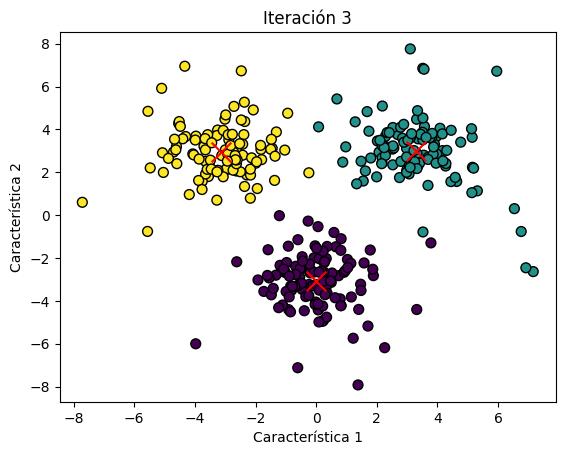

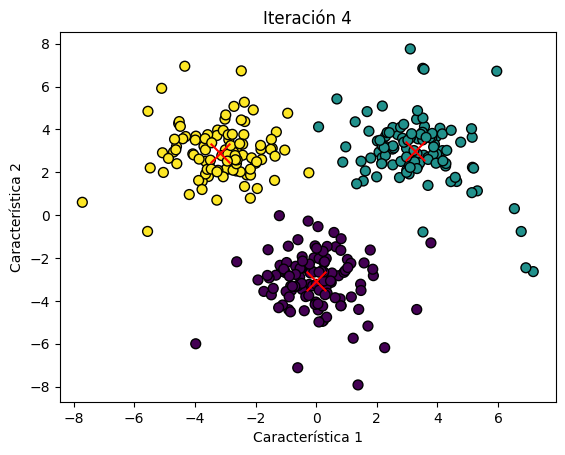


Resultados con ruido:
Coeficiente de Silueta: 0.67
Índice Calinski-Harabasz: 779.49


In [34]:
def generar_datos3():
    np.random.seed(42)
    grupo_1 = np.random.randn(100, 2) + np.array([0, -3])
    grupo_2 = np.random.randn(100, 2) + np.array([3, 3])
    grupo_3 = np.random.randn(100, 2) + np.array([-3, 3])
    datos = np.vstack([grupo_1, grupo_2, grupo_3])
    
    num_ruido = 30
    ruido_x = np.random.uniform(-8, 8, num_ruido)
    ruido_y = np.random.uniform(-8, 8, num_ruido)
    ruido = np.column_stack((ruido_x, ruido_y))
    datos = np.vstack([datos, ruido])
    
    return datos

if __name__ == "__main__":
    # Ejecutamos el algoritmo con y sin ruido para comparar
    datos_sin_ruido = generar_datos()
    k = 3
    etiquetas, centroides = kmeans_con_visualizacion(datos_sin_ruido, k)
    silueta, calinski_harabasz = calcular_metricas(datos_sin_ruido, etiquetas)
    print("\nResultados sin ruido:")
    print(f"Coeficiente de Silueta: {silueta:.2f}")
    print(f"Índice Calinski-Harabasz: {calinski_harabasz:.2f}")
    
    plt.figure() 
    datos_con_ruido = generar_datos3()
    etiquetas, centroides = kmeans_con_visualizacion(datos_con_ruido, k)
    silueta, calinski_harabasz = calcular_metricas(datos_con_ruido, etiquetas)
    print("\nResultados con ruido:")
    print(f"Coeficiente de Silueta: {silueta:.2f}")
    print(f"Índice Calinski-Harabasz: {calinski_harabasz:.2f}")

Con ruido el algoritmo necesita más iteraciones para converger y los centroides parecen ser más inestables durante las iteraciones

Cambia la estrategia de inicialización de los centroides. Inicializa los centroides aleatoriamente en un rango fijo (np.random.uniform). Compara los resultados con la inicialización original


Resultados con inicialización original:


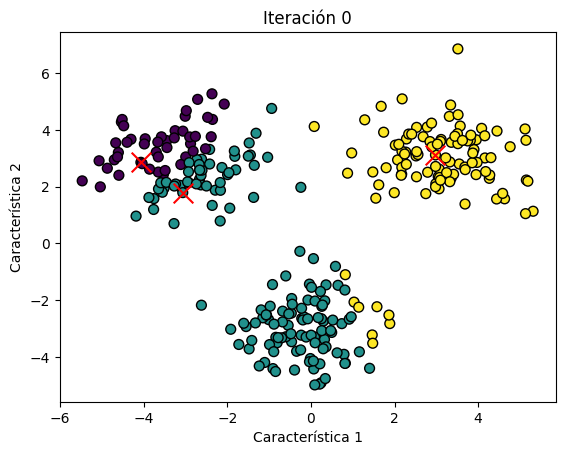

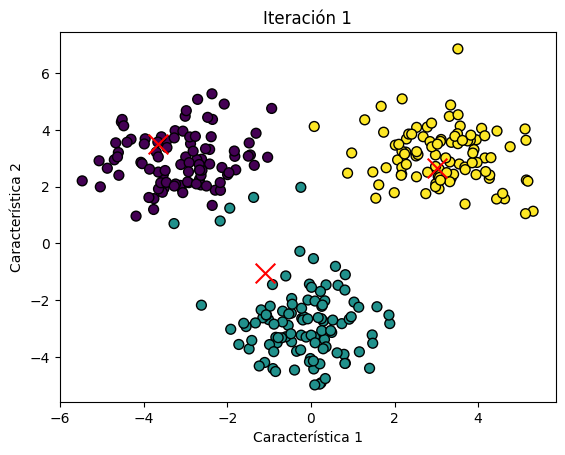

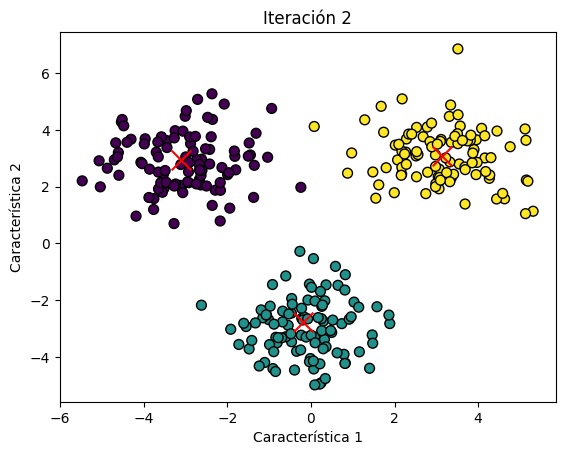

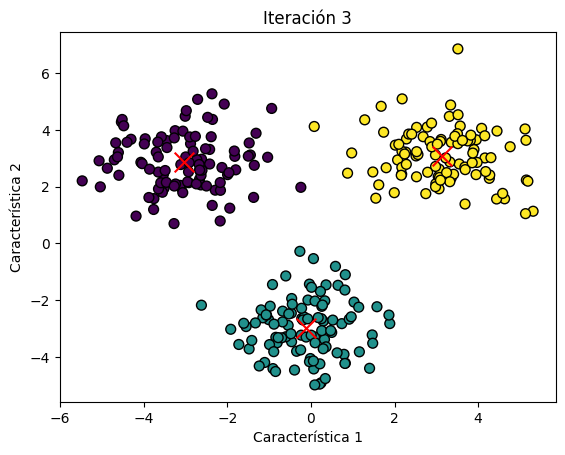

Coeficiente de Silueta: 0.72
Índice Calinski-Harabasz: 1135.20

Resultados con inicialización uniforme:


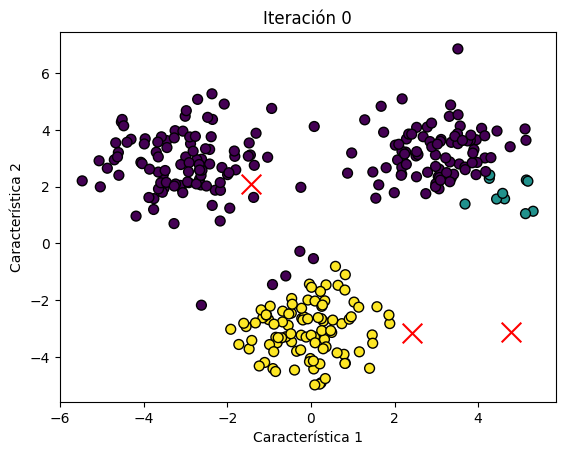

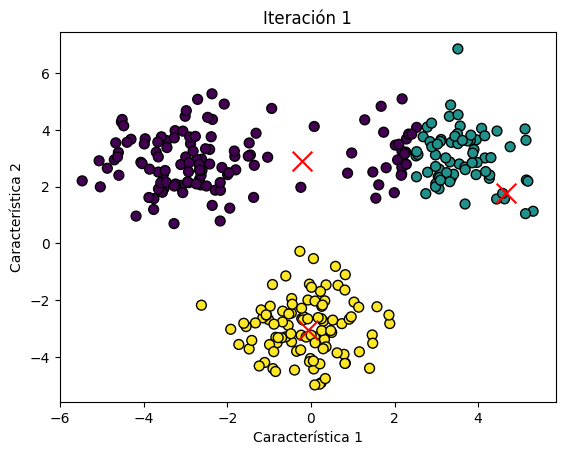

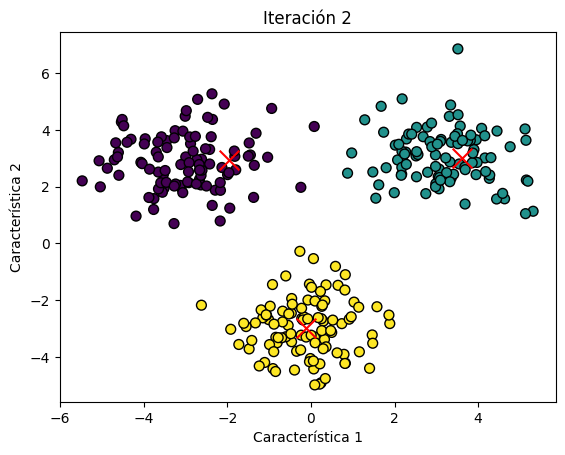

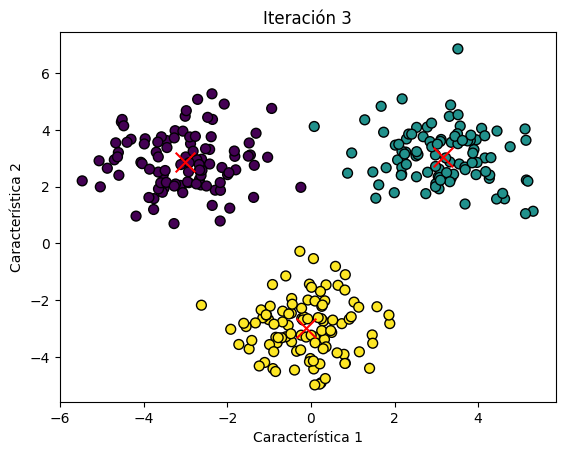

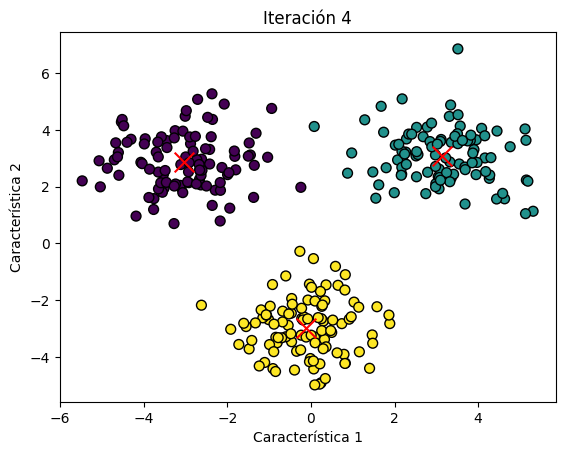

Coeficiente de Silueta: 0.72
Índice Calinski-Harabasz: 1135.20


In [35]:
def inicializar_centroides_uniforme(datos, k):
    min_x, min_y = np.min(datos, axis=0)
    max_x, max_y = np.max(datos, axis=0)
    
    np.random.seed(42)
    centroides_x = np.random.uniform(min_x, max_x, k)
    centroides_y = np.random.uniform(min_y, max_y, k)
    centroides = np.column_stack((centroides_x, centroides_y))
    
    return centroides

if __name__ == "__main__":
    # Generamos los datos de ejemplo
    datos = generar_datos()
    k = 3
    
    # Ejecutamos el algoritmo con la inicialización original
    print("\nResultados con inicialización original:")
    etiquetas, centroides = kmeans_con_visualizacion(datos, k)
    silueta, calinski_harabasz = calcular_metricas(datos, etiquetas)
    print(f"Coeficiente de Silueta: {silueta:.2f}")
    print(f"Índice Calinski-Harabasz: {calinski_harabasz:.2f}")
    
    plt.figure()
    
    # Modificamos temporalmente la función de inicialización
    original_init = inicializar_centroides
    inicializar_centroides = inicializar_centroides_uniforme
    
    # Ejecutamos el algoritmo con la nueva inicialización uniforme
    print("\nResultados con inicialización uniforme:")
    etiquetas, centroides = kmeans_con_visualizacion(datos, k)
    silueta, calinski_harabasz = calcular_metricas(datos, etiquetas)
    print(f"Coeficiente de Silueta: {silueta:.2f}")
    print(f"Índice Calinski-Harabasz: {calinski_harabasz:.2f}")
    
    # Restauramos la función original
    inicializar_centroides = original_init

Inicialización Original:

- Los centroides iniciales se seleccionaron de puntos existentes en los datos

- Convergió en 4 iteraciones

- Los clusters se formaron de manera más natural desde el principio

- La asignación inicial de clusters fue más cercana a la solución final

Inicialización Uniforme:

- Los centroides iniciales se colocaron de manera más dispersa en el espacio

- Necesitó 5 iteraciones para converger

- La iteración 0 muestra una asignación inicial menos óptima, con dos centroides fuera del área de los datos

- Se observa un mayor movimiento de los centroides entre iteraciones

Ejecuta el algoritmo varias veces con diferentes inicializaciones de centroides. ¿Obtienes siempre los mismos resultados? ¿Por qué? ¿Cómo puedes mitigar el impacto de una mala inicialización?


Ejecución 1:


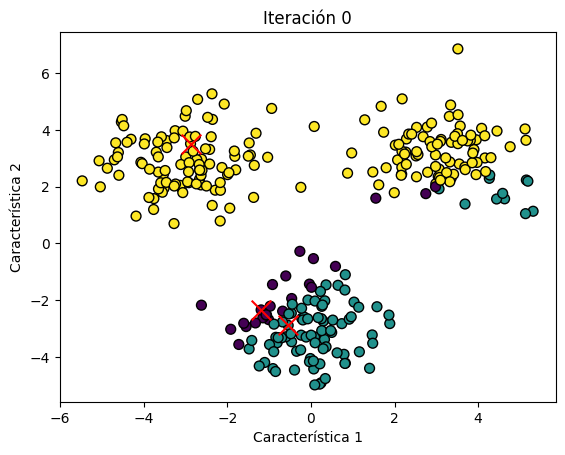

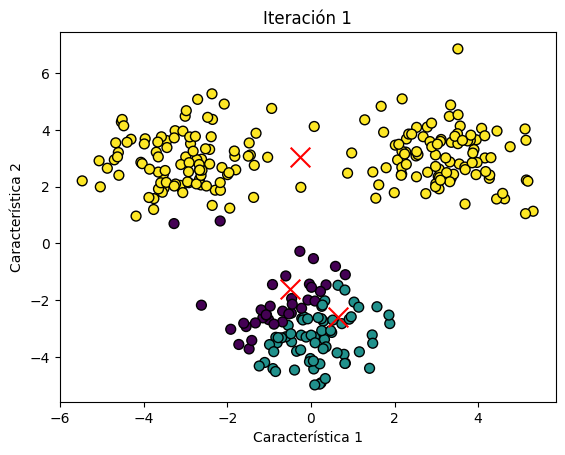

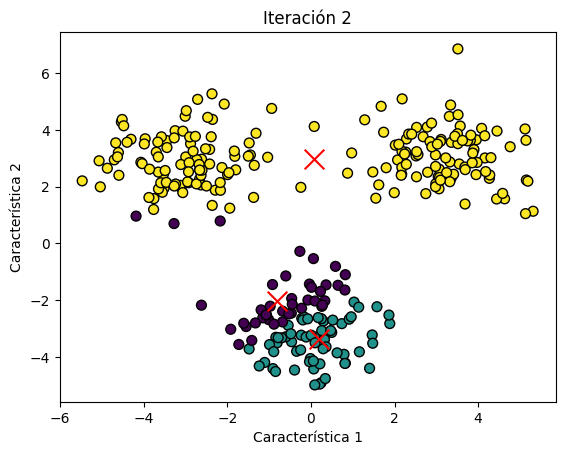

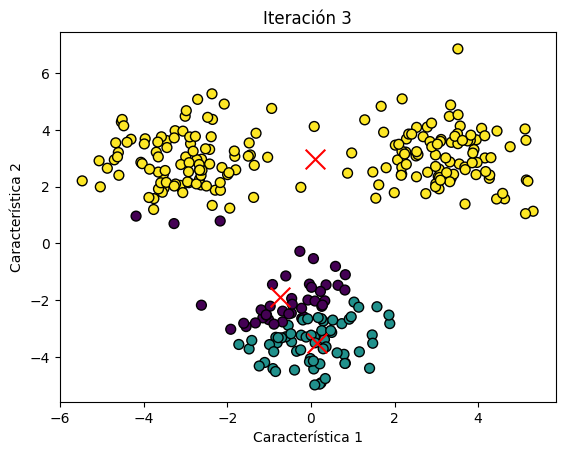

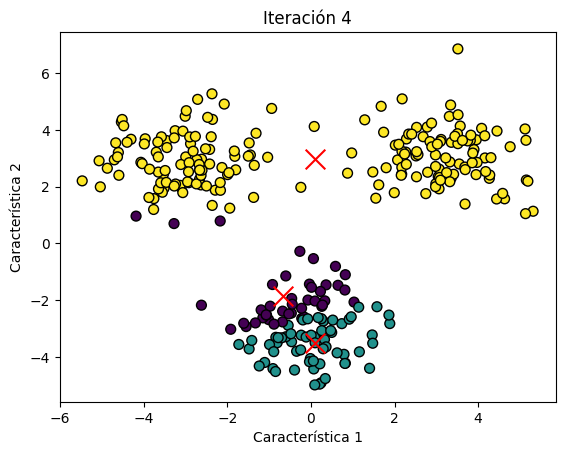

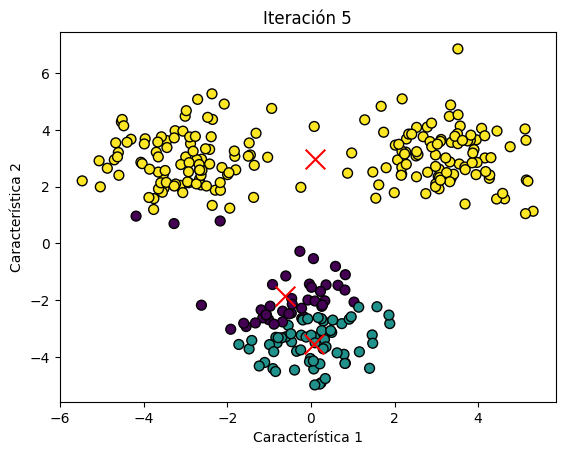

Coeficiente de Silueta: 0.31
Índice Calinski-Harabasz: 148.14

Ejecución 2:


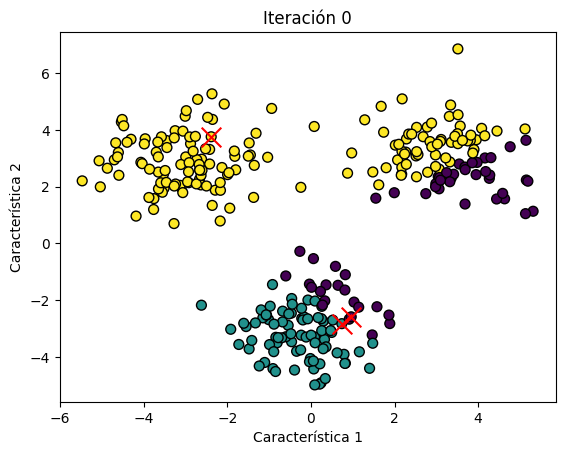

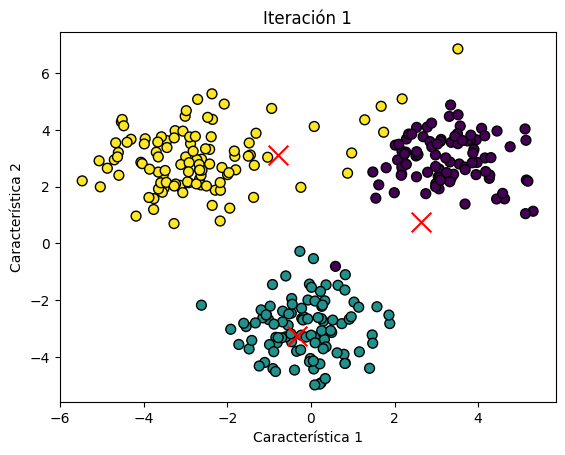

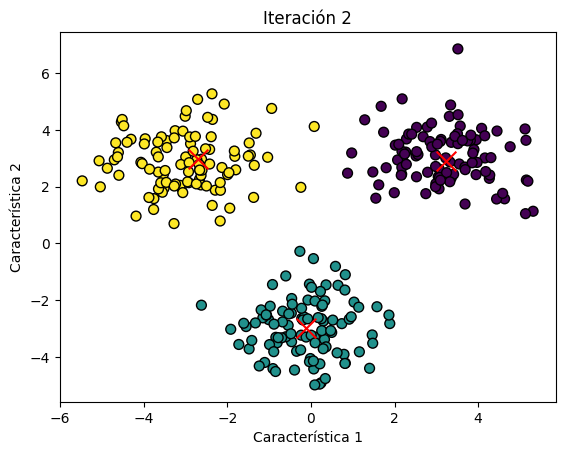

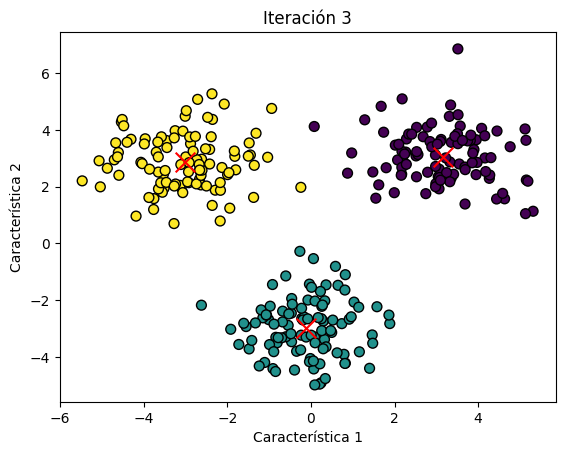

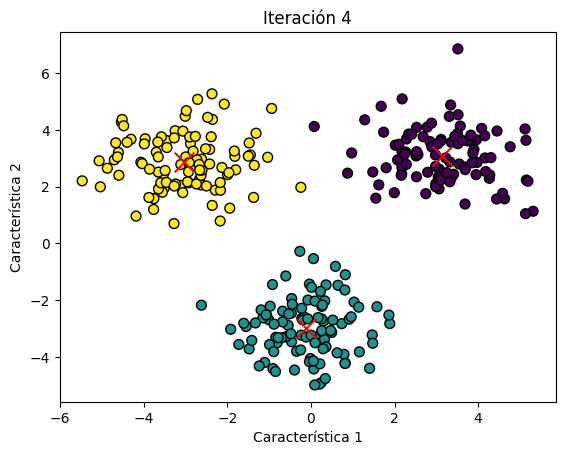

Coeficiente de Silueta: 0.72
Índice Calinski-Harabasz: 1135.20

Ejecución 3:


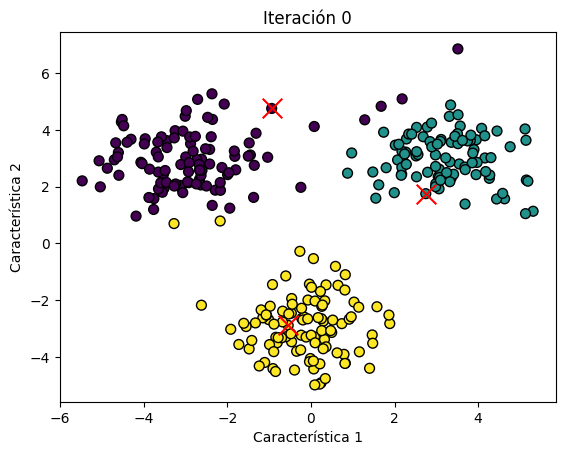

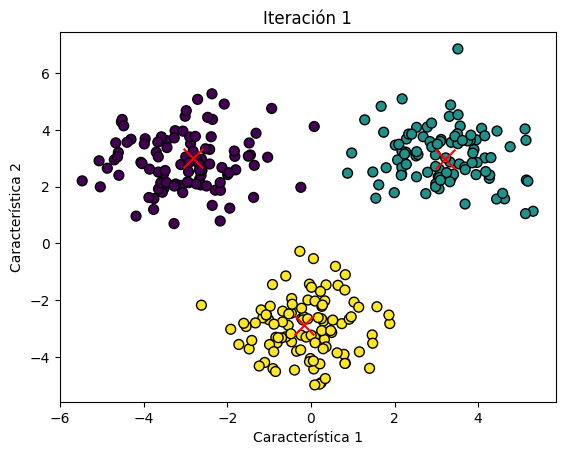

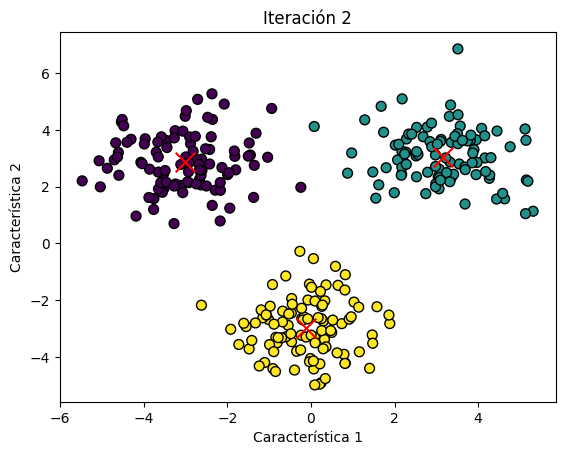

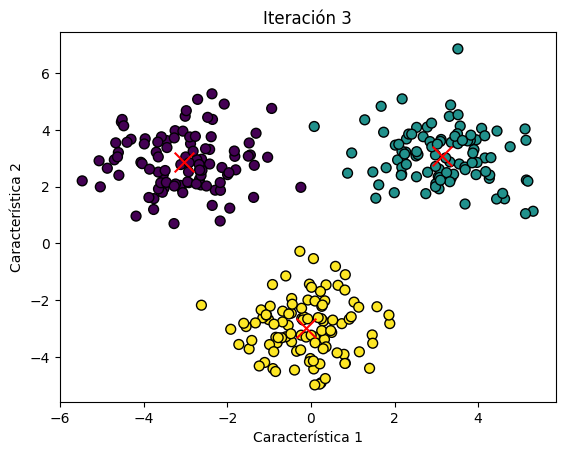

Coeficiente de Silueta: 0.72
Índice Calinski-Harabasz: 1135.20

Estadísticas de las ejecuciones:
Silueta - Media: 0.58, Desv. Est.: 0.19
Calinski-Harabasz - Media: 806.18, Desv. Est.: 465.31


<Figure size 640x480 with 0 Axes>

In [37]:
def inicializar_centroides2(datos, k, seed=None):
    if seed is not None:
        np.random.seed(seed)
    indices = np.random.choice(datos.shape[0], k, replace=False)
    centroides = datos[indices]
    return centroides

def kmeans_con_visualizacion2(datos, k, max_iter=100):
    # Inicializamos los centroides
    centroides = inicializar_centroides2(datos, k)

    for i in range(max_iter):
        # Asignamos los puntos a los centroides más cercanos
        etiquetas = asignar_centroides(datos, centroides)

        # Visualizamos la iteración actual
        visualizar_iteracion(datos, etiquetas, centroides, i)

        # Calculamos los nuevos centroides
        nuevos_centroides = actualizar_centroides(datos, etiquetas, k)

        # Verificamos si los centroides han cambiado
        if np.all(centroides == nuevos_centroides):
            break
        centroides = nuevos_centroides

    return etiquetas, centroides

if __name__ == "__main__":
    # Generamos los datos de ejemplo
    datos = generar_datos()
    k = 3
    
    # Ejecutamos el algoritmo múltiples veces con diferentes semillas
    num_ejecuciones = 3
    resultados = []
    
    for i in range(num_ejecuciones):
        print(f"\nEjecución {i+1}:")
        # Usamos una semilla diferente para cada ejecución
        etiquetas, centroides = kmeans_con_visualizacion2(datos, k)
        silueta, calinski_harabasz = calcular_metricas(datos, etiquetas)
        print(f"Coeficiente de Silueta: {silueta:.2f}")
        print(f"Índice Calinski-Harabasz: {calinski_harabasz:.2f}")
        resultados.append({
            'silueta': silueta,
            'calinski_harabasz': calinski_harabasz
        })
        plt.figure()
    
    # Mostramos estadísticas de las métricas
    siluetas = [r['silueta'] for r in resultados]
    calinski = [r['calinski_harabasz'] for r in resultados]
    
    print("\nEstadísticas de las ejecuciones:")
    print(f"Silueta - Media: {np.mean(siluetas):.2f}, Desv. Est.: {np.std(siluetas):.2f}")
    print(f"Calinski-Harabasz - Media: {np.mean(calinski):.2f}, Desv. Est.: {np.std(calinski):.2f}")

¿Obtienes siempre los mismos resultados? No

¿Por qué? La inicialización aleatoria de los centroides afecta la convergencia final. Diferentes posiciones iniciales pueden llevar a mínimos locales distintos

¿Cómo puedes mitigar el impacto de una mala inicialización? 

- Ejecutar el algoritmo múltiples veces y seleccionar el mejor resultado

- Usar las métricas de validación para comparar las diferentes ejecuciones

- Aumentar el número de iteraciones máximas

Investiga sobre el `silhouette_score` y `calinski_harabasz_score`

Silhouette Score

El Silhouette Score es una métrica que mide qué tan similar es un objeto a su propio cluster en comparación con otros clusters. El rango va de -1 a 1:

- Valor cercano a 1 : Indica que el punto está bien agrupado

- Valor cercano a 0 : Indica que el punto está entre dos clusters

- Valor cercano a -1 : Indica que el punto probablemente está en el cluster equivocado

Fórmula: silhouette = (b - a) / max(a, b)

1. La cohesión (a): distancia media entre un punto y todos los demás puntos en su mismo cluster

2. La separación (b): distancia media entre un punto y todos los puntos del cluster más cercano


Calinski-Harabasz Score

El índice Calinski-Harabasz, también conocido como criterio de ratio de varianza, evalúa la validez del clustering basándose en:

1. La dispersión entre clusters 

2. La dispersión dentro de los clusters

Cuanto mayor sea el valor, mejor será el clustering. 

Fórmula: CH = [tr(B_k) / k-1] / [tr(W_k) / (n-k)]

- tr(B_k) es la traza de la matriz de dispersión entre clusters

- tr(W_k) es la traza de la matriz de dispersión dentro de los clusters

- n es el número total de puntos

- k es el número de clusters


Estas métricas son útiles para:

1. Comparar diferentes ejecuciones del algoritmo

2. Determinar el número óptimo de clusters

3. Evaluar la calidad del clustering

4. Detectar problemas en la agrupación

Las usamos para:

1. Evaluar la calidad de diferentes inicializaciones

2. Comparar el rendimiento con y sin ruido

3. Validar los resultados del clustering

Implementa el Método del Codo para identificar visualmente el número óptimo de clusters. Grafica la "inercia" (suma de las distancias al cuadrado entre los puntos y sus centroides asignados) para diferentes valores de `k`.

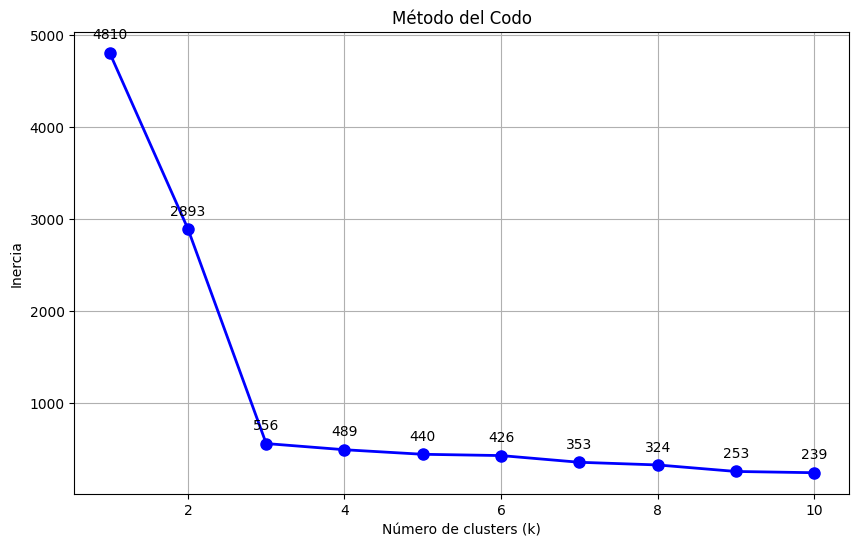


Valores de inercia para cada k:
k=1: 4809.78
k=2: 2892.98
k=3: 556.40
k=4: 489.25
k=5: 439.65
k=6: 425.68
k=7: 352.75
k=8: 323.64
k=9: 252.73
k=10: 238.98


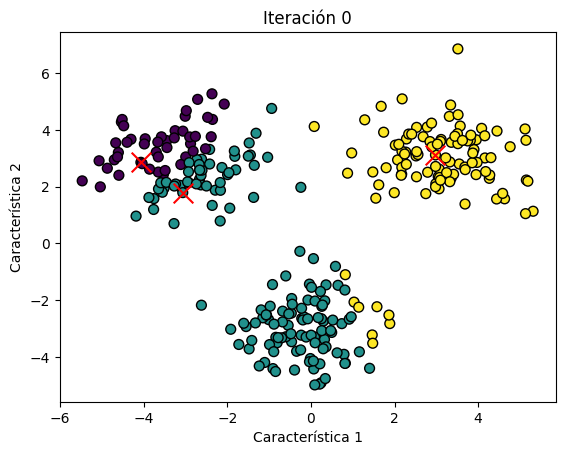

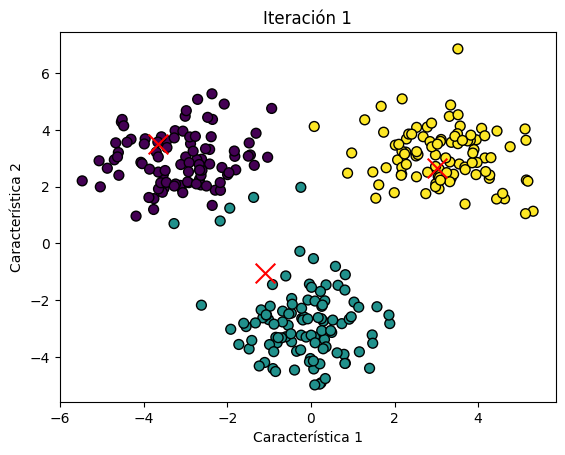

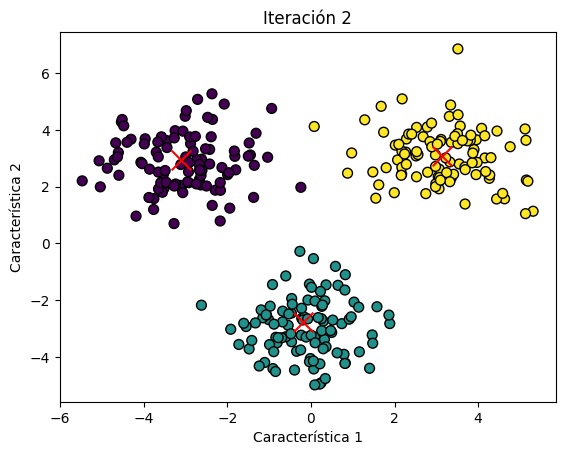

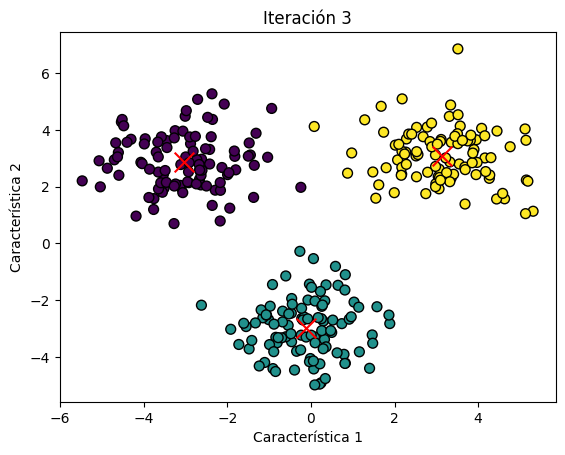


Resultados con k=3:
Coeficiente de Silueta: 0.72
Índice Calinski-Harabasz: 1135.20


In [50]:
def calcular_inercia(datos, etiquetas, centroides):
    distancias = np.linalg.norm(datos[:, np.newaxis] - centroides, axis=2)
    return np.sum(np.min(distancias, axis=1) ** 2)

def metodo_del_codo(datos, k_max=10):
    inercias = []
    k_valores = range(1, k_max + 1)
    
    for k in k_valores:
        # Ejecutamos k-means sin visualización
        centroides = inicializar_centroides(datos, k)
        etiquetas = asignar_centroides(datos, centroides)
        
        for _ in range(100):  # máximo de iteraciones
            nuevos_centroides = actualizar_centroides(datos, etiquetas, k)
            if np.all(centroides == nuevos_centroides):
                break
            centroides = nuevos_centroides
            etiquetas = asignar_centroides(datos, centroides)
        
        # Calculamos y guardamos la inercia
        inercia = calcular_inercia(datos, etiquetas, centroides)
        inercias.append(inercia)
    
    # Graficamos el método del codo
    plt.figure(figsize=(10, 6))
    plt.plot(k_valores, inercias, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Inercia')
    plt.title('Método del Codo')
    plt.grid(True)
    
    # Añadimos etiquetas de valores
    for k, inercia in zip(k_valores, inercias):
        plt.annotate(f'{inercia:.0f}', 
                    (k, inercia), 
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center')
    
    plt.show()
    return inercias

# ... existing code ...

if __name__ == "__main__":
    # Generamos los datos de ejemplo
    datos = generar_datos()
    
    # Aplicamos el método del codo
    inercias = metodo_del_codo(datos)
    
    # Mostramos los valores de inercia
    print("\nValores de inercia para cada k:")
    for k, inercia in enumerate(inercias, 1):
        print(f"k={k}: {inercia:.2f}")
    
    # Ejecutamos el algoritmo con k=3 para comparar
    k = 3
    etiquetas, centroides = kmeans_con_visualizacion(datos, k)
    
    # Calculamos las métricas de validación
    silueta, calinski_harabasz = calcular_metricas(datos, etiquetas)
    print(f"\nResultados con k={k}:")
    print(f"Coeficiente de Silueta: {silueta:.2f}")
    print(f"Índice Calinski-Harabasz: {calinski_harabasz:.2f}")

- Se observa claramente un punto de inflexión en k=3

- La inercia disminuye drásticamente de k=1 (4810) a k=3 (556)

- Después de k=3, la reducción es mucho más gradual